# Mengimpor library yang diperlukan

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import zipfile,os
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Memasang library yang diperlukan untuk melakukan train-test split


In [63]:
pip install split-folders

In [64]:
import split_folders

# Memuat dataset

In [65]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-31 12:54:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.92MB/s    in 45s     

2020-07-31 12:55:26 (6.78 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [66]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Membuat folder baru untuk train-test split

In [67]:
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:01, 1892.37 files/s]


In [68]:
os.listdir('/tmp/rockpaperscissors/')

['README_rpc-cv-images.txt',
 'rock',
 'val',
 'paper',
 'rps-cv-images',
 'train',
 'scissors']

In [69]:
os.listdir('/tmp/rockpaperscissors/train')

['rock', 'paper', 'scissors']

In [70]:
os.listdir('/tmp/rockpaperscissors/val')

['rock', 'paper', 'scissors']

# Membuat variabel yang berisi fungsi untuk mengaugmentasi dan rescale ulang data

In [71]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

# Mengaplikasikan fungsi dan melakukan resize resolusi gambar

In [72]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/train',  # direktori data latih
        target_size=(100, 150),  # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        batch_size=32,
        # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.


In [73]:
validation_generator = test_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/val', # direktori data validasi
        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        batch_size=32, # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 876 images belonging to 3 classes.


# Menggunakan model CNN untuk melakukan prediksi

In [74]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(100,150,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax')) #Fungsi aktivasi menggunakan softmax karena target memiliki lebih dari 2 kelas

In [75]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy']) #loss function menggunakan 'categorical_crossentropy' karena klasifikasi non-biner

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26496)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               13566464  
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [90]:
history = model.fit(train_generator,
      epochs=10,
      validation_data = validation_generator) 
# menampilkan akurasi pengujian data validasi


Epoch 1/10
41/41 [==============================] - 34s 821ms/step - loss: 0.1440 - accuracy: 0.9520 - val_loss: 0.2954 - val_accuracy: 0.9087
Epoch 2/10
41/41 [==============================] - 33s 813ms/step - loss: 0.1386 - accuracy: 0.9596 - val_loss: 0.1714 - val_accuracy: 0.9509
Epoch 3/10
41/41 [==============================] - 33s 814ms/step - loss: 0.0961 - accuracy: 0.9657 - val_loss: 0.2954 - val_accuracy: 0.8927
Epoch 4/10
41/41 [==============================] - 33s 812ms/step - loss: 0.0946 - accuracy: 0.9672 - val_loss: 0.1700 - val_accuracy: 0.9463
Epoch 5/10
41/41 [==============================] - 33s 815ms/step - loss: 0.0732 - accuracy: 0.9718 - val_loss: 0.1692 - val_accuracy: 0.9406
Epoch 6/10
41/41 [==============================] - 33s 811ms/step - loss: 0.0809 - accuracy: 0.9741 - val_loss: 0.2009 - val_accuracy: 0.9441
Epoch 7/10
41/41 [==============================] - 34s 820ms/step - loss: 0.0851 - accuracy: 0.9726 - val_loss: 0.1517 - val_accuracy: 0.9521

Dari proses training di atas kita dapatkan akurasi training data dan validation data di atas 90 persen, berarti model yang kita pilih good-fit tidak underfitting maupun overfitting

# Menampilkan grafik akurasi dan loss dari data training dan validasi dari setiap epoch

In [91]:
import matplotlib.pyplot as plt

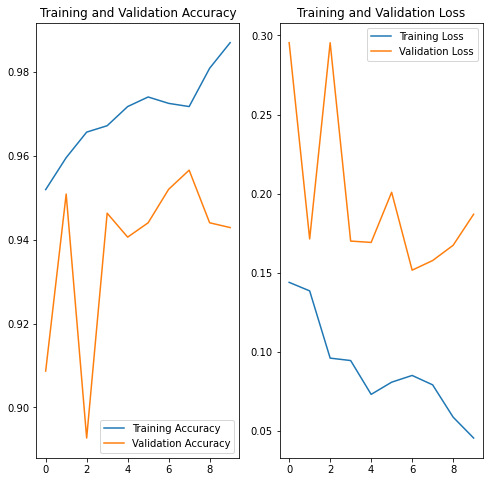

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Mengunggah foto untuk diprediksi

In [94]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

Saving 1DxbXT3M2qiMjCmC.png to 1DxbXT3M2qiMjCmC (1).png
1DxbXT3M2qiMjCmC.png
rock


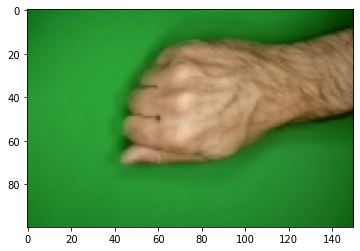

In [95]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][0]==0:
    if classes[0][1]==1:
      print('rock')
    else:
      print('scissor')
  else:
    print('scissor')

Saving 1Frbe8cdOdkciOBg.png to 1Frbe8cdOdkciOBg (3).png
1Frbe8cdOdkciOBg.png
paper


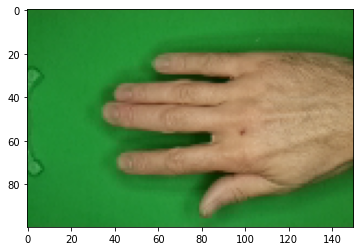

In [96]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][0]==0:
    if classes[0][1]==1:
      print('rock')
    else:
      print('scissor')
  else:
    print('scissor')

Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU (4).png
1Io5Ksm3bqy87EAU.png
scissor


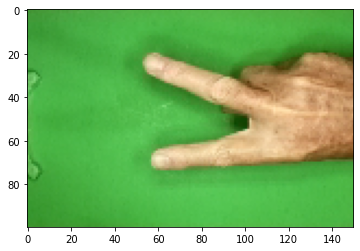

In [97]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][0]==0:
    if classes[0][1]==1:
      print('rock')
    else:
      print('scissor')
  else:
    print('scissor')

# Menggunakan model berbeda dengan mengimplementasikan transfer learning

In [113]:
base_model = tf.keras.applications.ResNet152V2(input_shape=(100, 150, 3),
                                               include_top=False,
                                               weights='imagenet')
#ResNet152v2 sebagai pre-trained model

In [114]:
base_model.trainable = False

In [115]:
#membuat model baru dengan Resnet152v2 sebagai base model lalu menggabungkan dengan layer classifier
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(units=3, activation='softmax')) #Fungsi aktivasi menggunakan softmax

In [116]:
model2.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [117]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 4, 5, 2048)        58331648  
_________________________________________________________________
flatten_4 (Flatten)          (None, 40960)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 122883    
Total params: 58,454,531
Trainable params: 122,883
Non-trainable params: 58,331,648
_________________________________________________________________


In [120]:
history2 = model2.fit(train_generator,
      epochs=5,
      validation_data = validation_generator) 
#epoch dikurangi sebagai kompensasi dari waktu training yang lebih lama

Epoch 1/5
41/41 [==============================] - 291s 7s/step - loss: 0.0771 - accuracy: 0.9916 - val_loss: 0.1128 - val_accuracy: 0.9897
Epoch 2/5
41/41 [==============================] - 292s 7s/step - loss: 0.0255 - accuracy: 0.9954 - val_loss: 0.0983 - val_accuracy: 0.9863
Epoch 3/5
41/41 [==============================] - 293s 7s/step - loss: 0.0258 - accuracy: 0.9977 - val_loss: 0.1745 - val_accuracy: 0.9897
Epoch 4/5
41/41 [==============================] - 293s 7s/step - loss: 0.0659 - accuracy: 0.9947 - val_loss: 0.0615 - val_accuracy: 0.9954
Epoch 5/5
41/41 [==============================] - 292s 7s/step - loss: 0.0168 - accuracy: 0.9970 - val_loss: 0.1107 - val_accuracy: 0.9863


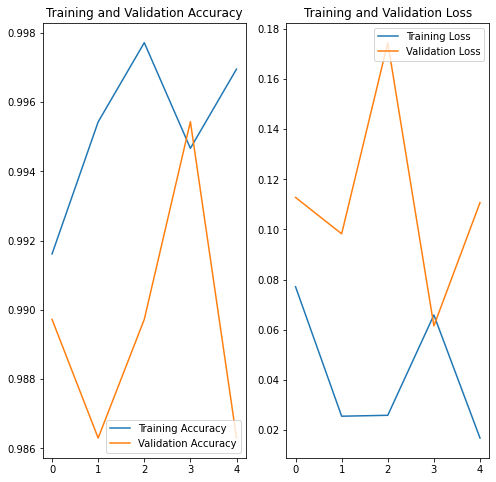

In [123]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Pada model ini akurasinya jauh lebih tinggi dari model sebelumnya dengan akurasi lebih dari 96 persen dari tiap epochnya pada data training maupun data validation. Berarti model ini juga good-fit tidak underfitting maupun overfittiing**

Waktu training untuk model pertama adalah 334 detik dan model kedua adalah 1461 detik dengan total waktu latih keduanya adalah 1795 detik atau 29 menit 55 detik